# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
%matplotlib inline 


In [50]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [3]:
colnames=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df_pima=pd.read_csv('pima-indians-diabetes.data', names= colnames)


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [4]:
df_pima.head(10)

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1

# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
df_pima.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [6]:
df_pima.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [17]:
df_pima=df_pima.replace(0,np.nan).fillna(df_pima.median())
df_pima

preg   plas  pres  skin   test  mass   pedi  age  class
0     6.0  148.0  72.0  35.0   30.5  33.6  0.627   50    1.0
1     1.0   85.0  66.0  29.0   30.5  26.6  0.351   31    0.0
2     8.0  183.0  64.0  23.0   30.5  23.3  0.672   32    1.0
3     1.0   89.0  66.0  23.0   94.0  28.1  0.167   21    0.0
4     3.0  137.0  40.0  35.0  168.0  43.1  2.288   33    1.0
5     5.0  116.0  74.0  23.0   30.5  25.6  0.201   30    0.0
6     3.0   78.0  50.0  32.0   88.0  31.0  0.248   26    1.0
7    10.0  115.0  72.0  23.0   30.5  35.3  0.134   29    0.0
8     2.0  197.0  70.0  45.0  543.0  30.5  0.158   53    1.0
9     8.0  125.0  96.0  23.0   30.5  32.0  0.232   54    1.0
10    4.0  110.0  92.0  23.0   30.5  37.6  0.191   30    0.0
11   10.0  168.0  74.0  23.0   30.5  38.0  0.537   34    1.0
12   10.0  139.0  80.0  23.0   30.5  27.1  1.441   57    0.0
13    1.0  189.0  60.0  23.0  846.0  30.1  0.398   59    1.0
14    5.0  166.0  72.0  19.0  175.0  25.8  0.587   51    1.0
15    7.0  100.0  72.0  23.0   30.5  30.0  0.484   32    1.0
16    3.0  118.0  84.0  47.0  230.0  45.8  0.551   31    1.0
17    7.0  107.0  74.0  23.0   30.5  29.6  0.254   31    1.0
18    1.0  103.0  30.0  38.0   83.0  43.3  0.183   33    0.0
19    1.0  115.0  70.0  30.0   96.0  34.6  0.529   32    1.0
20    3.0  126.0  88.0  41.0  235.0  39.3  0.704   27    0.0
21    8.0   99.0  84.0  23.0   30.5  35.4  0.388   50    0.0
22    7.0  196.0  90.0  23.0   30.5  39.8  0.451   41    1.0
23    9.0  119.0  80.0  35.0   30.5  29.0  0.263   29    1.0
24   11.0  143.0  94.0  33.0  146.0  36.6  0.254   51    1.0
25   10.0  125.0  70.0  26.0  115.0  31.1  0.205   41    1.0
26    7.0  147.0  76.0  23.0   30.5  39.4  0.257   43    1.0
27    1.0   97.0  66.0  15.0  140.0  23.2  0.487   22    0.0
28   13.0  145.0  82.0  19.0  110.0  22.2  0.245   57    0.0
29    5.0  117.0  92.0  23.0   30.5  34.1  0.337   38    0.0
..    ...    ...   ...   ...    ...   ...    ...  ...    ...
738   2.0   99.0  60.0  17.0  160.0  36.6  0.453   21    0.0
739   1.0  102.0  74.0  23.0   30.5  39.5  0.293   42    1.0
740  11.0  120.0  80.0  37.0  150.0  42.3  0.785   48    1.0
741   3.0  102.0  44.0  20.0   94.0  30.8  0.400   26    0.0
742   1.0  109.0  58.0  18.0  116.0  28.5  0.219   22    0.0
743   9.0  140.0  94.0  23.0   30.5  32.7  0.734   45    1.0
744  13.0  153.0  88.0  37.0  140.0  40.6  1.174   39    0.0
745  12.0  100.0  84.0  33.0  105.0  30.0  0.488   46    0.0
746   1.0  147.0  94.0  41.0   30.5  49.3  0.358   27    1.0
747   1.0   81.0  74.0  41.0   57.0  46.3  1.096   32    0.0
748   3.0  187.0  70.0  22.0  200.0  36.4  0.408   36    1.0
749   6.0  162.0  62.0  23.0   30.5  24.3  0.178   50    1.0
750   4.0  136.0  70.0  23.0   30.5  31.2  1.182   22    1.0
751   1.0  121.0  78.0  39.0   74.0  39.0  0.261   28    0.0
752   3.0  108.0  62.0  24.0   30.5  26.0  0.223   25    0.0
753   3.0  181.0  88.0  44.0  510.0  43.3  0.222   26    1.0
754   8.0  154.0  78.0  32.0   30.5  32.4  0.443   45    1.0
755   1.0  128.0  88.0  39.0  110.0  36.5  1.057   37    1.0
756   7.0  137.0  90.0  41.0   30.5  32.0  0.391   39    0.0
757   3.0  123.0  72.0  23.0   30.5  36.3  0.258   52    1.0
758   1.0  106.0  76.0  23.0   30.5  37.5  0.197   26    0.0
759   6.0  190.0  92.0  23.0   30.5  35.5  0.278   66    1.0
760   2.0   88.0  58.0  26.0   16.0  28.4  0.766   22    0.0
761   9.0  170.0  74.0  31.0   30.5  44.0  0.403   43    1.0
762   9.0   89.0  62.0  23.0   30.5  22.5  0.142   33    0.0
763  10.0  101.0  76.0  48.0  180.0  32.9  0.171   63    0.0
764   2.0  122.0  70.0  27.0   30.5  36.8  0.340   27    0.0
765   5.0  121.0  72.0  23.0  112.0  26.2  0.245   30    0.0
766   1.0  126.0  60.0  23.0   30.5  30.1  0.349   47    1.0
767   1.0   93.0  70.0  31.0   30.5  30.4  0.315   23    0.0

[768 rows x 9 columns]

# Q5 Print the descriptive statistics of each & every column using describe() function

In [18]:
df_pima.describe().T

count        mean         std     min       25%       50%        75%  \
preg   768.0    4.278646    3.021516   1.000   2.00000    3.0000    6.00000   
plas   768.0  121.656250   30.438286  44.000  99.75000  117.0000  140.25000   
pres   768.0   72.386719   12.096642  24.000  64.00000   72.0000   80.00000   
skin   768.0   27.334635    9.229014   7.000  23.00000   23.0000   32.00000   
test   768.0   94.652344  105.547598  14.000  30.50000   31.2500  127.25000   
mass   768.0   32.450911    6.875366  18.200  27.50000   32.0000   36.60000   
pedi   768.0    0.471876    0.331329   0.078   0.24375    0.3725    0.62625   
age    768.0   33.240885   11.760232  21.000  24.00000   29.0000   41.00000   
class  768.0    0.348958    0.476951   0.000   0.00000    0.0000    1.00000   

          max  
preg    17.00  
plas   199.00  
pres   122.00  
skin    99.00  
test   846.00  
mass    67.10  
pedi     2.42  
age     81.00  
class    1.00

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [19]:
df_pima.groupby('class').count()

preg  plas  pres  skin  test  mass  pedi  age
class                                               
0.0     500   500   500   500   500   500   500  500
1.0     268   268   268   268   268   268   268  268

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [42]:
df_pima['class'].value_counts()

0.0    500
1.0    268
Name: class, dtype: int64

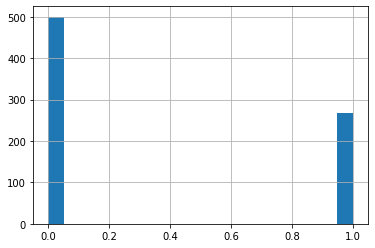

In [47]:
df_pima['class'].hist(bins=20)

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


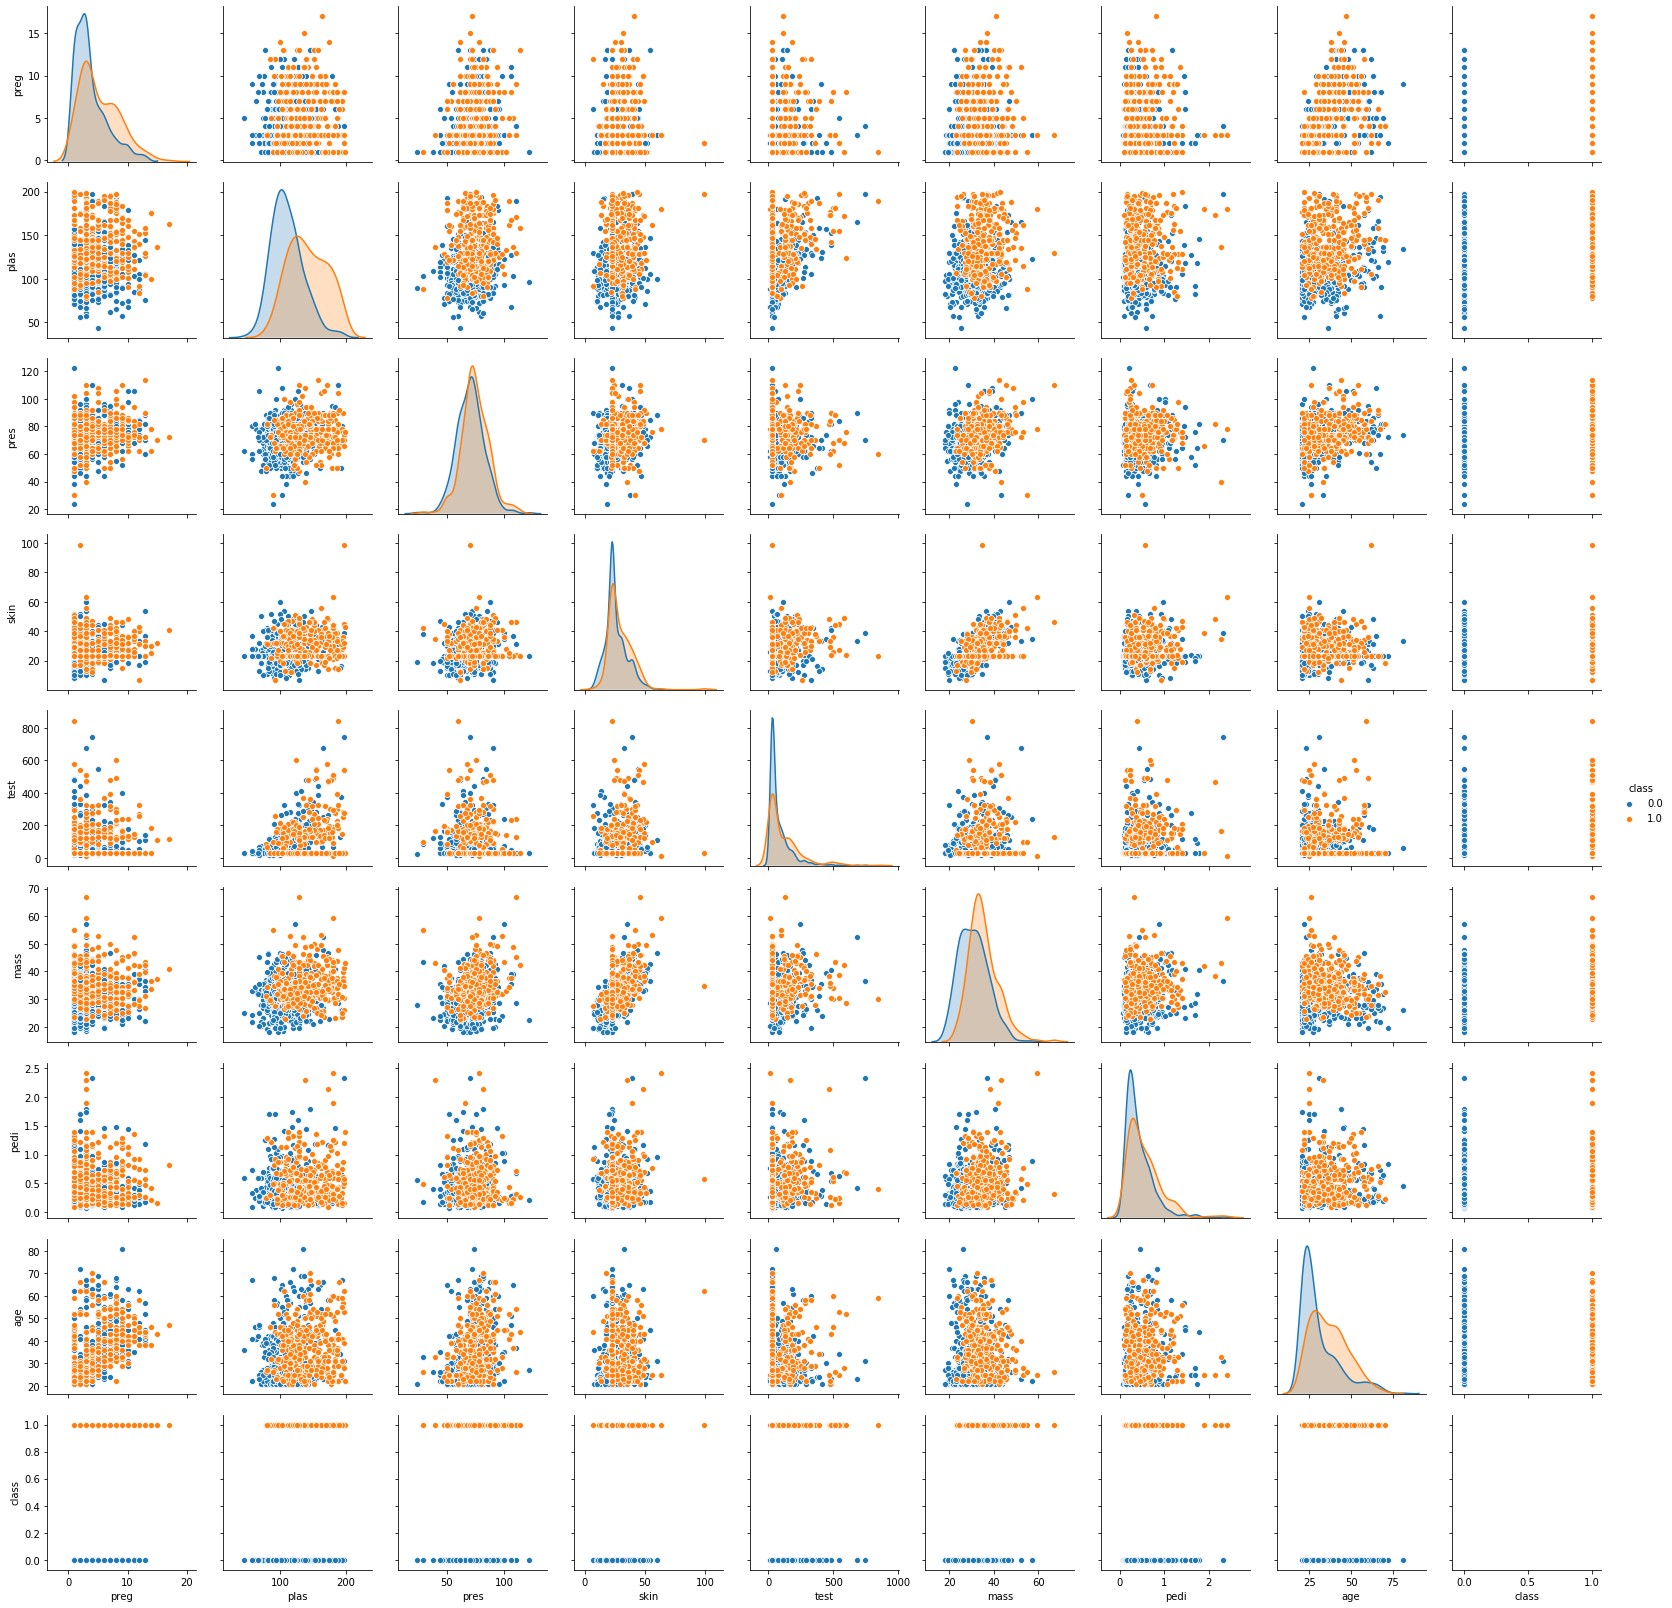

In [20]:
sns.pairplot(df_pima , hue='class' , diag_kind = 'kde')

In [ ]:
Variables which look normally distributed are plas, pres, skin and mass.
There are variables which has skew / outliars / exponential distribution i.e. preg, test, pedi, age

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [58]:
X=df_pima.drop('class',axis=1)
Y=df_pima['class']
train_set, test_set, train_labels, test_labels=train_test_split(X, Y, test_size=.30 , random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [106]:
df_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)

In [107]:
df_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [108]:
y_predict = df_model.predict(test_set)

# Q10 Print the accuracy of the model & print the confusion matrix 

Print the feature importance of the decision model - Optional

In [109]:
reg_dt_model.score(train_set , train_labels)

0.8324022346368715

In [110]:
reg_dt_model.score(test_set , test_labels)

0.7878787878787878

In [98]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[114  32]
 [ 30  55]]


In [100]:
reg_dt_model.feature_importances_

array([0.05480284, 0.40560593, 0.02971296, 0.01624881, 0.        ,
       0.22179077, 0.08589265, 0.18594604])